In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy.sql import func

In [5]:
# reflect an existing database into a new model
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
Base=automap_base()

In [7]:
# reflect the tables
Base.prepare(engine, reflect=True)

In [8]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
meas=Base.classes.measurement
station=Base.classes.station

In [10]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Climate Analysis

In [11]:
first_row = session.query(meas).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2188f499670>,
 'tobs': 65.0,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'prcp': 0.08,
 'id': 1}

In [12]:
first_row = session.query(station).first()
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x2188f4a2430>,
 'elevation': 3.0,
 'name': 'WAIKIKI 717.2, HI US',
 'station': 'USC00519397',
 'id': 1,
 'longitude': -157.8168,
 'latitude': 21.2716}

In [13]:
import datetime as dt

In [14]:
#Calculate last entry
last_date=session.query(meas.date).order_by(meas.date.desc()).first()
last_date

('2017-08-23')

In [15]:
#Calculate 1 yr before last entry
query_since=(dt.date(2017, 8, 23)-dt.timedelta(days=365))
print(query_since)

2016-08-23


In [16]:
prcp_data=session.query(meas.date, meas.prcp).\
    filter(meas.date.between(query_since, '2017-08-23'))


In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Precep_Data=pd.DataFrame(prcp_data)
Precep_Data.dropna(inplace=True)
Precep_Data.head(5)

,date,prcp
0,2016-08-23,0.00
1,2016-08-24,0.08
2,2016-08-25,0.08
3,2016-08-26,0.00
4,2016-08-27,0.00


In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
# Sort the dataframe by date
Precep_Data=Precep_Data.set_index('date')
Precep_Data.sort_index(inplace=True)
Precep_Data.head(5)

,prcp
date,
2016-08-23,0.00
2016-08-23,0.02
2016-08-23,0.05
2016-08-23,0.70
2016-08-23,0.15


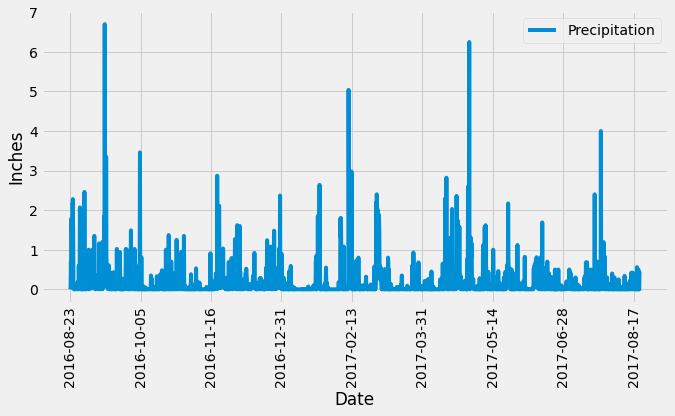

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data
Precep_Data.plot(y='prcp',use_index=True,rot=90,figsize=(10,5), label="Precipitation")
plt.xlabel("Date")
plt.ylabel("Inches")
plt.legend(loc='upper right')

In [20]:
###########################################################################################
                            #Plotting Using Matplot just to practice
###########################################################################################
# Design a query to retrieve the last 12 months of precipitation data and plot the results
Precep_Data=pd.DataFrame(prcp_data)
Precep_Data.dropna(inplace=True)
Precep_Data.tail(10)

,date,prcp
2216,2017-08-10,0.07
2218,2017-08-12,0.14
2220,2017-08-14,0.22
2221,2017-08-15,0.42
2222,2017-08-16,0.42
2223,2017-08-17,0.13
2225,2017-08-19,0.09
2227,2017-08-21,0.56
2228,2017-08-22,0.50
2229,2017-08-23,0.45


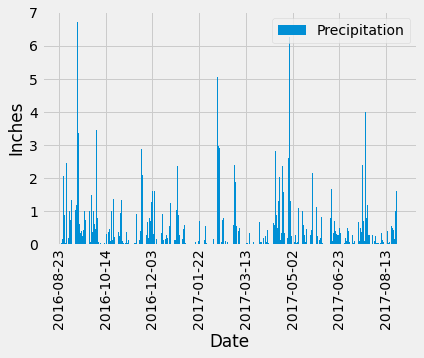

<Figure size 1080x360 with 0 Axes>

In [21]:
###########################################################################################
                            #Plotting Using Matplot just to practice
###########################################################################################
# Use Pandas Plotting with Matplotlib to plot the data
plt.bar(Precep_Data['date'],Precep_Data['prcp'],label="Precipitation")
plt.xticks(rotation=90)
plt.xlabel("Date")
plt.ylabel("Inches")
plt.xticks(np.arange(0, 400, step=50))
plt.legend(loc='upper right')
plt.figure(figsize=(15,5))
plt.show()


In [22]:
# Use Pandas to calcualte the summary statistics for the precipitation data
Precep_Data.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [23]:
# Design a query to show how many stations are available in this dataset?
session.query(station.id).order_by(station.id.desc()).first()

(9)

In [24]:
session.query(station.id).all()

[(1), (2), (3), (4), (5), (6), (7), (8), (9)]

In [25]:
session.query(meas.station).group_by(meas.station).all()

[('USC00511918'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00516128'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519281'),
 ('USC00519397'),
 ('USC00519523')]

In [26]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(meas.station, func.count(meas.station)).group_by(meas.station).all()

[('USC00511918', 1979),
 ('USC00513117', 2709),
 ('USC00514830', 2202),
 ('USC00516128', 2612),
 ('USC00517948', 1372),
 ('USC00518838', 511),
 ('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00519523', 2669)]

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(meas.station, func.count(meas.station)).group_by(meas.station).order_by(func.count(meas.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [28]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(meas.station,func.max(meas.tobs)).filter(meas.station=='USC00519281').first()

('USC00519281', 85.0)

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?
session.query(meas.station,func.avg(meas.tobs)).filter(meas.station=='USC00519281').first()

('USC00519281', 71.66378066378067)

In [30]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
Temp_Data=pd.DataFrame(session.query(meas.station, meas.tobs).filter(meas.date.between('2016-08-23', '2017-08-23')).filter(meas.station=='USC00519281'))
Temp_Data.dropna(inplace=True)
Temp_Data.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,77.0
2,USC00519281,80.0
3,USC00519281,80.0
4,USC00519281,75.0


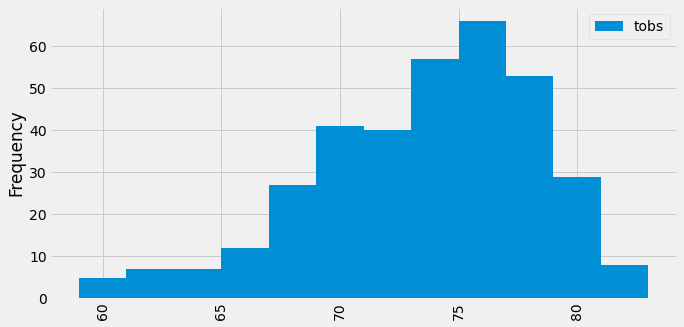

In [31]:
Temp_Data.plot.hist(rot=90,figsize=(10,5), bins=12)


## Bonus Challenge Assignment

In [32]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

NameError: name 'Measurement' is not defined

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
